In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as viz

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


In [3]:
num_train_images, width, height = train_data.shape
num_pixels = width * height
x_train = train_data.reshape(num_train_images,
                             num_pixels).astype('float32') / 255

num_test_images, _, _ = test_data.shape
x_test = test_data.reshape(num_test_images,
                           num_pixels).astype('float32') / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

build the network

hyperparameters:
* architecture: number of hidden layers, number of units in each hidden layer
* optimization: learning rate

In [4]:
num_units = [512]
num_hidden_layers = len(num_units)
learning_rate = 0.0001

model = models.Sequential()
# first hidden layer with input shape specified
model.add(layers.Dense(num_units[0], activation='relu',
                       input_shape=(num_pixels,)))
for i in range(1, num_hidden_layers):
    model.add(layers.Dense(num_units[i], activation='relu'))
# output layer
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=learning_rate),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

train the model

hyperparameters:
* batch size
* number of epochs

In [5]:
num_epochs = 20
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=128,
                    validation_split=0.2).history

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.7047 - categorical_accuracy: 0.8411 - val_loss: 0.3325 - val_categorical_accuracy: 0.9138
Epoch 2/20
48000/48000 [==============================] - 1s 11us/step - loss: 0.3121 - categorical_accuracy: 0.9148 - val_loss: 0.2615 - val_categorical_accuracy: 0.9275
Epoch 3/20
48000/48000 [==============================] - 1s 11us/step - loss: 0.2563 - categorical_accuracy: 0.9295 - val_loss: 0.2283 - val_categorical_accuracy: 0.9368
Epoch 4/20
48000/48000 [==============================] - 1s 11us/step - loss: 0.2221 - categorical_accuracy: 0.9391 - val_loss: 0.2041 - val_categorical_accuracy: 0.9435
Epoch 5/20
48000/48000 [==============================] - 1s 11us/step - loss: 0.1974 - categorical_accuracy: 0.9444 - val_loss: 0.1865 - val_categorical_accuracy: 0.9490
Epoch 6/20
48000/48000 [==============================] - 1s 11us/step - loss: 0.1774 - categor

In [6]:
# evaluate
_, test_accuracy = model.evaluate(x_test, y_test)
print('test data accuracy: {}'.format(test_accuracy))

10000/10000 [==============================] - 0s 14us/step
test data accuracy: 0.9738


In [7]:
# changing hyperparameters has little effect on the model performance
# layers: [512] vs [2048] vs [512, 256, 64, 32]
# number of epochs: 3, 5, 8, 20
# learning rate 0.001
#   --> overfitting 0.999 training vs 0.98 test accuracy, starts after epoch 3
# [512] and learning rate 0.01
#   --> lower overfitting 0.986 training vs 0.973 test accuracy
# [512] and learning rate 0.0001
#   --> lower overfitting 0.984 training vs 0.975 test accuracy,
#       starts after epoch 7

# almost no dependence of performance on hyperparameters
#   what is the simplest network with a similar performance for MNIST dataset?
#     use Bayesian optimization to find hyperparameters values
#     explore the dynamic architecture - graph instead of layer

In [8]:
from keras import regularizers

# add L2 weights regularization
# hyperparameter: regularization parameter
reg_lambda = 0.01

model_l2 = models.Sequential()
# first hidden layer with input shape specified
model_l2.add(layers.Dense(num_units[0], activation='relu', kernel_regularizer=regularizers.l2(reg_lambda),
                          input_shape=(num_pixels,)))
for i in range(1, num_hidden_layers):
    model_l2.add(layers.Dense(num_units[i], activation='relu'), kernel_regularizer=regularizers.l2(reg_lambda))
# output layer
model_l2.add(layers.Dense(10, activation='softmax'))

model_l2.compile(optimizer=optimizers.RMSprop(lr=learning_rate),
                 loss=losses.categorical_crossentropy,
                 metrics=[metrics.categorical_accuracy])

In [9]:
history_l2 = model_l2.fit(x_train, y_train, epochs=num_epochs, batch_size=128, validation_split=0.2).history

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 14us/step - loss: 4.2011 - categorical_accuracy: 0.8303 - val_loss: 1.9442 - val_categorical_accuracy: 0.8995
Epoch 2/20
48000/48000 [==============================] - 1s 12us/step - loss: 1.2554 - categorical_accuracy: 0.9010 - val_loss: 0.8382 - val_categorical_accuracy: 0.9153
Epoch 3/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.7054 - categorical_accuracy: 0.9110 - val_loss: 0.5789 - val_categorical_accuracy: 0.9213
Epoch 4/20
48000/48000 [==============================] - 1s 11us/step - loss: 0.5391 - categorical_accuracy: 0.9176 - val_loss: 0.4731 - val_categorical_accuracy: 0.9274
Epoch 5/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.4654 - categorical_accuracy: 0.9224 - val_loss: 0.4300 - val_categorical_accuracy: 0.9274
Epoch 6/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.4257 - categor

In [10]:
_, test_accuracy = model_l2.evaluate(x_test, y_test)
print('test data accuracy: {}'.format(test_accuracy))

10000/10000 [==============================] - 0s 14us/step
test data accuracy: 0.9548


In [11]:
# add dropout regularization
# hyperparameter: dropout rate(s)
rate = 0.5

model_dropout = models.Sequential()
# first hidden layer with input shape specified
model_dropout.add(layers.Dense(num_units[0], activation='relu', input_shape=(num_pixels,)))
model_dropout.add(layers.Dropout(rate))
for i in range(1, num_hidden_layers):
    model_dropout.add(layers.Dense(num_units[i], activation='relu'))
    model_dropout.add(layers.Dropout(rate))
# output layer
model_dropout.add(layers.Dense(10, activation='softmax'))

model_dropout.compile(optimizer=optimizers.RMSprop(lr=learning_rate),
                      loss=losses.categorical_crossentropy,
                      metrics=[metrics.categorical_accuracy])

In [12]:
history_dropout = model_dropout.fit(x_train, y_train, epochs=num_epochs, batch_size=128, validation_split=0.2).history

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 15us/step - loss: 0.8869 - categorical_accuracy: 0.7593 - val_loss: 0.3845 - val_categorical_accuracy: 0.9022
Epoch 2/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.4034 - categorical_accuracy: 0.8850 - val_loss: 0.2896 - val_categorical_accuracy: 0.9226
Epoch 3/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.3264 - categorical_accuracy: 0.9067 - val_loss: 0.2492 - val_categorical_accuracy: 0.9315
Epoch 4/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2821 - categorical_accuracy: 0.9204 - val_loss: 0.2215 - val_categorical_accuracy: 0.9386
Epoch 5/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2524 - categorical_accuracy: 0.9285 - val_loss: 0.2004 - val_categorical_accuracy: 0.9452
Epoch 6/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2271 - categor

In [13]:
_, test_accuracy = model_dropout.evaluate(x_test, y_test)
print('test data accuracy: {}'.format(test_accuracy))

10000/10000 [==============================] - 0s 15us/step
test data accuracy: 0.9693


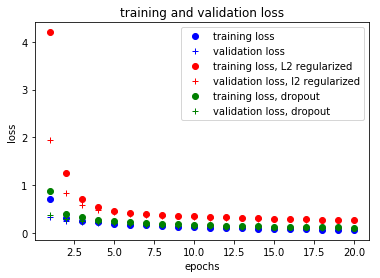

In [14]:
x = range(1, num_epochs + 1)

viz.plot(x, history['loss'], 'bo', label='training loss')
viz.plot(x, history['val_loss'], 'b+', label='validation loss')
viz.plot(x, history_l2['loss'], 'ro', label='training loss, L2 regularized')
viz.plot(x, history_l2['val_loss'], 'r+', label='validation loss, l2 regularized')
viz.plot(x, history_dropout['loss'], 'go', label='training loss, dropout')
viz.plot(x, history_dropout['val_loss'], 'g+', label='validation loss, dropout')
viz.title('training and validation loss')
viz.xlabel('epochs')
viz.ylabel('loss')
viz.legend()
viz.show()

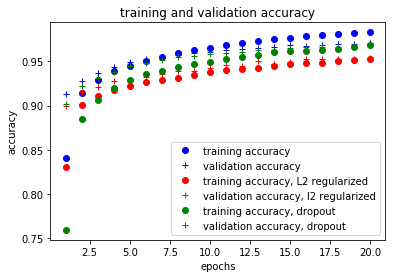

In [15]:
viz.plot(x, history['categorical_accuracy'], 'bo', label='training accuracy')
viz.plot(x, history['val_categorical_accuracy'], 'b+', label='validation accuracy')
viz.plot(x, history_l2['categorical_accuracy'], 'ro', label='training accuracy, L2 regularized')
viz.plot(x, history_l2['val_categorical_accuracy'], 'r+', label='validation accuracy, l2 regularized')
viz.plot(x, history_dropout['categorical_accuracy'], 'go', label='training accuracy, dropout')
viz.plot(x, history_dropout['val_categorical_accuracy'], 'g+', label='validation accuracy, dropout')
viz.title('training and validation accuracy')
viz.xlabel('epochs')
viz.ylabel('accuracy')
viz.legend()
viz.show()

In [16]:
#convnet version

# 1 channel in input images
x_train_imgs = train_data.reshape((num_train_images, width, height, 1)).astype('float32') / 255
x_test_imgs = test_data.reshape((num_test_images, width, height, 1)).astype('float32') / 255

model_convnet = models.Sequential()
model_convnet.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model_convnet.add(layers.MaxPooling2D((2, 2)))
model_convnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_convnet.add(layers.MaxPooling2D((2, 2)))
model_convnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_convnet.add(layers.Flatten())
model_convnet.add(layers.Dense(64, activation='relu'))
model_convnet.add(layers.Dense(10, activation='softmax'))

model_convnet.compile(optimizer=optimizers.RMSprop(lr=learning_rate),
                      loss=losses.categorical_crossentropy,
                      metrics=[metrics.categorical_accuracy])

In [17]:
history_convnet = model_convnet.fit(x_train_imgs, y_train, epochs=num_epochs, batch_size=64, validation_split=0.2).history

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.7394 - categorical_accuracy: 0.8073 - val_loss: 0.2644 - val_categorical_accuracy: 0.9204
Epoch 2/20
48000/48000 [==============================] - 3s 73us/step - loss: 0.2224 - categorical_accuracy: 0.9331 - val_loss: 0.1765 - val_categorical_accuracy: 0.9465
Epoch 3/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.1457 - categorical_accuracy: 0.9573 - val_loss: 0.1294 - val_categorical_accuracy: 0.9620
Epoch 4/20
48000/48000 [==============================] - 3s 68us/step - loss: 0.1101 - categorical_accuracy: 0.9670 - val_loss: 0.0938 - val_categorical_accuracy: 0.9725
Epoch 5/20
48000/48000 [==============================] - 4s 77us/step - loss: 0.0901 - categorical_accuracy: 0.9726 - val_loss: 0.0823 - val_categorical_accuracy: 0.9762
Epoch 6/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.0770 - categor

In [18]:
_, test_accuracy = model_convnet.evaluate(x_test_imgs, y_test)
print('test data accuracy: {}'.format(test_accuracy))

10000/10000 [==============================] - 0s 29us/step
test data accuracy: 0.9894


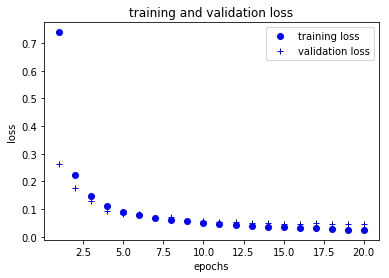

In [19]:
x = range(1, num_epochs + 1)

viz.plot(x, history_convnet['loss'], 'bo', label='training loss')
viz.plot(x, history_convnet['val_loss'], 'b+', label='validation loss')
viz.title('training and validation loss')
viz.xlabel('epochs')
viz.ylabel('loss')
viz.legend()
viz.show()

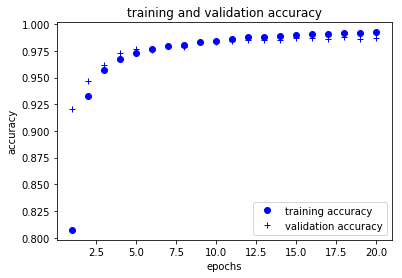

In [20]:
viz.plot(x, history_convnet['categorical_accuracy'], 'bo', label='training accuracy')
viz.plot(x, history_convnet['val_categorical_accuracy'], 'b+', label='validation accuracy')
viz.title('training and validation accuracy')
viz.xlabel('epochs')
viz.ylabel('accuracy')
viz.legend()
viz.show()